<a href="https://colab.research.google.com/github/Vivek-23-Titan/Signature-Replication-using-Generative-Adversarial-Networks/blob/master/Best_Classifier_of_CGAN_Generated_Signatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries**##

In [1]:
from __future__ import print_function
import tensorflow as tf
print(tf.__version__)

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU, Dropout, ReLU
from keras.layers import Conv2D, Reshape, Flatten, Activation
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model, np_utils, to_categorical
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

2.4.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Load the Dataset from Drive**##

In [3]:
!cp "/content/drive/MyDrive/My Segmented Signatures/Original_Images_Folder.zip" /content/

In [4]:
from zipfile import ZipFile
with ZipFile('/content/Original_Images_Folder.zip', 'r') as zip:
  zip.extractall()

In [11]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/X_train/amit/*.PNG")
X_train1 = []
Y_train1 = []
dim = (64,64) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train1.append(im_bw)
    Y_train1.append([0])

Y_train1 = np.array(Y_train1)

In [22]:
path = glob.glob(r"/content/X_train/aswal/*.PNG")
X_train2 = []
Y_train2 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train2.append(im_bw)
    Y_train2.append([1])

Y_train2 = np.array(Y_train2)

In [13]:
path = glob.glob(r"/content/X_train/daniel/*.PNG")
X_train3 = []
Y_train3 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train3.append(im_bw)
    Y_train3.append([2])

Y_train3 = np.array(Y_train3)

In [14]:
path = glob.glob(r"/content/X_train/john/*.PNG")
X_train4 = []
Y_train4 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train4.append(im_bw)
    Y_train4.append([3])

Y_train4 = np.array(Y_train4)

In [15]:
path = glob.glob(r"/content/X_train/kevin/*.PNG")
X_train5 = []
Y_train5 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train5.append(im_bw)
    Y_train5.append([4])

Y_train5 = np.array(Y_train5)

In [16]:
path = glob.glob(r"/content/X_train/lalita/*.PNG")
X_train6 = []
Y_train6 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train6.append(im_bw)
    Y_train6.append([5])

Y_train6 = np.array(Y_train6)

In [17]:
path = glob.glob(r"/content/X_train/ram/*.PNG")
X_train7 = []
Y_train7 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train7.append(im_bw)
    Y_train7.append([6])

Y_train7 = np.array(Y_train7)

In [18]:
path = glob.glob(r"/content/X_train/sancho/*.PNG")
X_train8 = []
Y_train8 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train8.append(im_bw)
    Y_train8.append([7])

Y_train8 = np.array(Y_train8)

In [19]:
path = glob.glob(r"/content/X_train/vinod/*.PNG")
X_train9 = []
Y_train9 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train9.append(im_bw)
    Y_train9.append([8])

Y_train9 = np.array(Y_train9)

In [20]:
path = glob.glob(r"/content/X_train/vivek/*.PNG")
X_train10 = []
Y_train10 = []

for img in path:
    n = cv2.imread(img,0)    
    resized = cv2.resize(n, dim)
    (thresh, im_bw) = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = cv2.bitwise_not(im_bw)
    X_train10.append(im_bw)
    Y_train10.append([9])

Y_train10 = np.array(Y_train10)

In [23]:
#Compile all the classes to form the training dataset
X_train = np.concatenate([X_train1,X_train2,X_train3,X_train4,X_train5,X_train6,X_train7,X_train8,X_train9,X_train10])
Y_train = np.concatenate([Y_train1,Y_train2,Y_train3,Y_train4,Y_train5,Y_train6,Y_train7,Y_train8,Y_train9,Y_train10])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X = X_train
Y = Y_train
print(X_train.shape)
print(Y_train.shape)

(1000, 64, 64)
(1000, 1)


In [ ]:
for i in range(0, 1000, 50):
  plt.imshow(np.squeeze(X_train[i]))
  plt.show()
  print(Y_train1[i])

##**Test Dataset**##

In [24]:
!cp "/content/drive/MyDrive/My Segmented Signatures/New_Generated_Signatures.zip" /content/

In [25]:
with ZipFile('/content/New_Generated_Signatures.zip', 'r') as zip:
  zip.extractall()

In [27]:
X1_test = []
for i in range(3000):
    path = glob.glob(r"/content/New_Generated_Signatures/" + str(i) + ".png")
    n = cv2.imread(path[0], 0)
    X1_test.append(n)

X1_test = np.array(X1_test)
X1_test = np.expand_dims(X1_test, -1)
print(X1_test.shape)

(3000, 64, 64, 1)


In [28]:
Y1_test = []
for i in range(len(X1_test)):
  Y1_test.append([(i%10)])
Y1_test = np.array(Y1_test)
print(Y1_test.shape)

(3000, 1)


In [29]:
X1_train = np.expand_dims(X_train, -1)

In [30]:
#One hot encoding
from keras.utils import to_categorical

Y_train1 = to_categorical(Y_train)
Y_test1 = to_categorical(Y1_test)

In [31]:
print(X1_train.shape, X1_test.shape)
print(Y_train1.shape, Y_test1.shape)

(1000, 64, 64, 1) (3000, 64, 64, 1)
(1000, 10) (3000, 10)


In [52]:
#Shuffle
from sklearn.utils import shuffle
for i in range(100):
  X1_train, Y_train1 = shuffle(X1_train, Y_train1, random_state=0)
  X1_test, Y_test1 = shuffle(X1_test, Y_test1, random_state=0)

##**Convolutional Classifier Model**##

In [66]:
model = Sequential()

model.add(Conv2D(32, kernel_size=5, strides=2, input_shape=((64,64, 1)), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=5, strides=2, padding="same"))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=5, strides=2, padding="same"))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

#model.summary()

In [67]:
optimizer = Adam(lr=0.00011)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [55]:
history = model.fit(X1_train, Y_train1, batch_size = 100, epochs=100, validation_data = (X1_test, Y_test1), shuffle = True, verbose = 1)

Epoch 1/100
10/10 [==============================] - 2s 66ms/step - loss: 2.6261 - accuracy: 0.1022 - val_loss: 2.2552 - val_accuracy: 0.2167
Epoch 2/100
10/10 [==============================] - 0s 33ms/step - loss: 2.3642 - accuracy: 0.1490 - val_loss: 2.1015 - val_accuracy: 0.3597
Epoch 3/100
10/10 [==============================] - 0s 33ms/step - loss: 2.2421 - accuracy: 0.1950 - val_loss: 1.9486 - val_accuracy: 0.3737
Epoch 4/100
10/10 [==============================] - 0s 34ms/step - loss: 2.1394 - accuracy: 0.2185 - val_loss: 1.7902 - val_accuracy: 0.4030
Epoch 5/100
10/10 [==============================] - 0s 34ms/step - loss: 1.9808 - accuracy: 0.2820 - val_loss: 1.6261 - val_accuracy: 0.3967
Epoch 6/100
10/10 [==============================] - 0s 33ms/step - loss: 1.7723 - accuracy: 0.3404 - val_loss: 1.4613 - val_accuracy: 0.4657
Epoch 7/100
10/10 [==============================] - 0s 34ms/step - loss: 1.5681 - accuracy: 0.4267 - val_loss: 1.3031 - val_accuracy: 0.5353
Epoch 

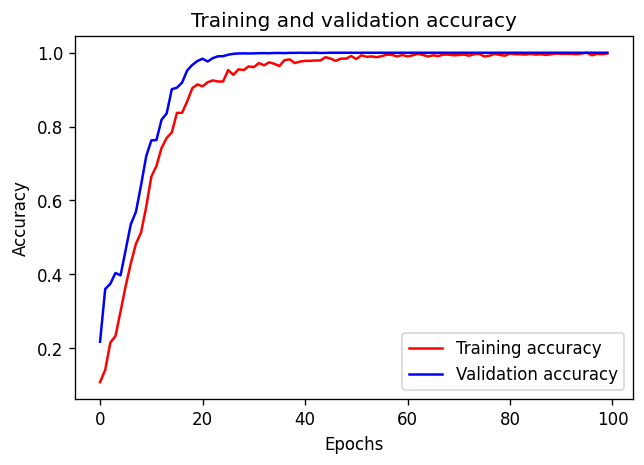

In [57]:
#Plot the training history of the CNN
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6,4), dpi=120)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

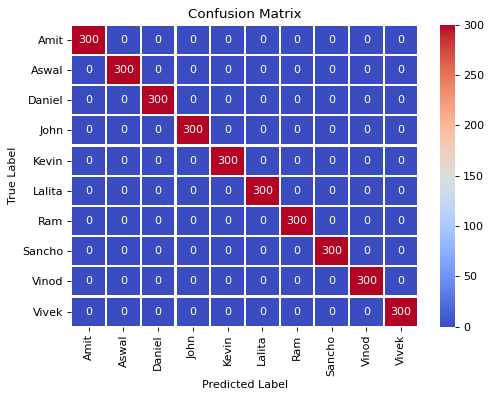

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       300
           7       1.00      1.00      1.00       300
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       300

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [59]:
Labels = ['Amit', 'Aswal', 'Daniel', 'John', 'Kevin', 'Lalita', 'Ram', 'Sancho', 'Vinod', 'Vivek']

#Display the confusion matrix
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(7, 5), dpi=80)
    #plt.figure(figsize=(9, 6))

    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=Labels,
                yticklabels=Labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    #fig.savefig('Confusion_Matrix.png')


y_pred_test = model.predict(X1_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test1, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))